In [33]:
#computation of the Kac polynomials for the Kronecker quiver with r arrows in dimension (d_1,d_2)

In [34]:
R.<q>=PolynomialRing(QQ)

In [35]:
K=FractionField(R)

In [36]:
S.<x1,x2>=PowerSeriesRing(K)

In [37]:
def produitbilin(l1,l2):  #bilinear pairing of partitions
    r=0
    l1c=Partition(l1).conjugate()
    l2c=Partition(l2).conjugate()
    l=min(len(l2c),len(l1c))
    for i in range(l):
        r=r+l1c[i]*l2c[i]
    return(r)

In [38]:
def phi(r): #polynomials in q^{-1}
    p=1
    for i in range(1,r+1):
        p=p*(1-q^(-i))
    return(p)

In [39]:
def b(l):
    lc=Partition(l).conjugate()+[0]
    r=1
    for i in range(len(lc)-1):
        r=r*phi(lc[i]-lc[i+1])
    return(r)

In [40]:
def polynomeP(d1,d2,r):
    P=S(0)
    for i in range(d1+1):
        for j in range(d2+1):
            for p1 in Partitions(i).list():
                for p2 in Partitions(j).list():
                    P=P+((q^(r*produitbilin(p1,p2)))/(q^(produitbilin(p1,p1)+produitbilin(p2,p2))*b(p1)*b(p2)))*(x1^i)*(x2^j)
    return(P)

In [41]:
def serieH(d1,d2,N,r):
    s=0
    p=polynomeP(d1,d2,r)
    for i in range(1,N+1):
        s=s-(1-p)^i/i
    return(s)

In [42]:
def polyH(N,r,d1,d2):
    ser=serieH(d1,d2,N,r)
    d=gcd(d1,d2)
    pol=d*(1/(ZZ(d1).factorial()))*(1/(ZZ(d2).factorial()))*((S((S(ser).derivative(x1,ZZ(d1))).derivative(x2,ZZ(d2)))).constant_coefficient())
    return(pol)

In [43]:
def KacPolA(d1,d2,r): #function computing the Kac polynomial of K_r in dimension (d_1,d_2)
    N=d1+d2
    d=gcd(d1,d2)
    A=0
    div=d.divisors()
    for i in div:
        A=A+moebius(i)*(polyH(N,r,ZZ(d1/i),ZZ(d2/i))(q^i))
    A=A*((q-1)/d)
    return(A)

In [44]:
d1=1

In [45]:
d2=2

In [46]:
A=KacPolA(d1,d2,200) #example of a Kac polynomial for the Kronecker quiver with 200 arrows

In [47]:
A

q^396 + q^395 + 2*q^394 + 2*q^393 + 3*q^392 + 3*q^391 + 4*q^390 + 4*q^389 + 5*q^388 + 5*q^387 + 6*q^386 + 6*q^385 + 7*q^384 + 7*q^383 + 8*q^382 + 8*q^381 + 9*q^380 + 9*q^379 + 10*q^378 + 10*q^377 + 11*q^376 + 11*q^375 + 12*q^374 + 12*q^373 + 13*q^372 + 13*q^371 + 14*q^370 + 14*q^369 + 15*q^368 + 15*q^367 + 16*q^366 + 16*q^365 + 17*q^364 + 17*q^363 + 18*q^362 + 18*q^361 + 19*q^360 + 19*q^359 + 20*q^358 + 20*q^357 + 21*q^356 + 21*q^355 + 22*q^354 + 22*q^353 + 23*q^352 + 23*q^351 + 24*q^350 + 24*q^349 + 25*q^348 + 25*q^347 + 26*q^346 + 26*q^345 + 27*q^344 + 27*q^343 + 28*q^342 + 28*q^341 + 29*q^340 + 29*q^339 + 30*q^338 + 30*q^337 + 31*q^336 + 31*q^335 + 32*q^334 + 32*q^333 + 33*q^332 + 33*q^331 + 34*q^330 + 34*q^329 + 35*q^328 + 35*q^327 + 36*q^326 + 36*q^325 + 37*q^324 + 37*q^323 + 38*q^322 + 38*q^321 + 39*q^320 + 39*q^319 + 40*q^318 + 40*q^317 + 41*q^316 + 41*q^315 + 42*q^314 + 42*q^313 + 43*q^312 + 43*q^311 + 44*q^310 + 44*q^309 + 45*q^308 + 45*q^307 + 46*q^306 + 46*q^305 + 47*q^304 +

In [48]:
def listdegree(d): #creates a list with the numbers i/d, i=0...d.
    u=[]
    for i in range(0,d+1):
        u=u+[i/d]
    return u

In [49]:
r=15
A=R(KacPolA(3,2,r))
deg=A.degree()
l=A.list()
a=max(l)
ll=[(1/a)*x for x in l]
g=list_plot(list(zip(listdegree(deg),ll)))

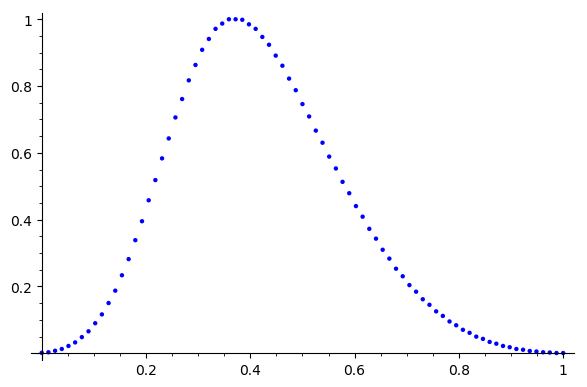

In [50]:
g